# Boosting and Stacking Exercises

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [1]:
from __future__ import print_function
import os
data_path = ['F:\Essential Files\Coding Projects\Machine Learning Class 1']

## Question 1

* Import the data from the file `Human_Activity_Recognition_Using_Smartphones_Data.csv` and examine the shape and data types. For the data types, there will be too many to list each column separately. Rather, aggregate the types by count.
* Determine if the float columns need to be scaled.

In [2]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [3]:
data.shape

(10299, 562)

In [4]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [5]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [6]:
#The float columns do not need to be scaled because they are all values between -1 and 1.

## Question 2

* Integer encode the activities.
* Split the data into train and test data sets. Decide if the data will be stratified or not during the train/test split.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(n=10)

9445    1
1844    3
19      2
9644    0
5232    4
9564    2
4212    2
3420    5
6905    3
1309    5
Name: Activity, dtype: int32

In [8]:
data.Activity.value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

In [9]:
data.Activity.value_counts(normalize=True)
#Not evenly distributed, must use SSS

0    0.188756
2    0.185067
1    0.172541
3    0.167201
5    0.149917
4    0.136518
Name: Activity, dtype: float64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = data.columns[:-1]

SSS = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(SSS.split(data[feature_cols], data['Activity']))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Activity']

In [11]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 3

* Fit gradient boosted tree models with all parameters set to their defaults the following tree numbers (`n_estimators = [25, 50, 100, 200, 400]`) and evaluate the accuracy on the test data for each of these models. 
* Plot the accuracy as a function of estimator number.

**Note:** This question may take some time to execute, depending on how many different values are fit for estimators. Setting `max_features=4` in the gradient boosting classifier will increase the convergence rate.

Also, this is similar to question 3 from week 9, except that there is no such thing as out-of-bag error for boosted models. And the `warm_flag=True` setting has a bug in the gradient boosted model, so don't use it. Simply create the model inside the `for` loop and set the number of estimators at this time. This will make the fitting take a little longer. Additionally, boosting models tend to take longer to fit than bagged ones because the decision stumps must be fit successively.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

n_estimators = [25, 50, 100, 200, 400]

acc_list = list()

for x in n_estimators:
    GBC = GradientBoostingClassifier(learning_rate=0.1, max_features=4, subsample=0.5, n_estimators=x)
    GBC = GBC.fit(X_train, y_train)
    y_predict = GBC.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_predict))

acc_list

[0.9171521035598705,
 0.954368932038835,
 0.9724919093851133,
 0.9838187702265372,
 0.9896440129449838]

In [14]:
score_data = [[25, acc_list[0]], [50, acc_list[1]], [100, acc_list[2]], [200, acc_list[3]], [400, acc_list[4]]]
score_data

[[25, 0.9171521035598705],
 [50, 0.954368932038835],
 [100, 0.9724919093851133],
 [200, 0.9838187702265372],
 [400, 0.9896440129449838]]

In [15]:
acc_score_df = pd.DataFrame(score_data, columns = ['n_estimators', 'accuracy_score'])
print(acc_score_df)

   n_estimators  accuracy_score
0            25        0.917152
1            50        0.954369
2           100        0.972492
3           200        0.983819
4           400        0.989644


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

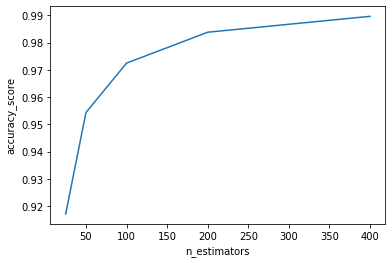

In [17]:
ax = sns.lineplot(x="n_estimators", y="accuracy_score", markers=True, dashes=False, data=acc_score_df)

## Question 4

* Using a grid search with cross-validation, fit a new gradient boosted classifier with the a list of estimators, similar to question 3. Also consider  varying the learning rates (0.1, 0.01, 0.001, etc.), the subsampling value (1.0 or 0.5), and the number of maximum features (1, 2, etc.).
* Examine the parameters of the best fit model.
* Calculate relevant error metrics on this model and examine the confusion matrix.

**Note:** this question may take some time to execute, depending on how many features are associated with the grid search. It is recommended to start with only a few to ensure everything is working correctly and then add more features. Setting `max_features=4` in the gradient boosting classifier will increase the convergence rate.

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [25, 50, 100, 200, 400],
             "learning_rate": [0.1, 0.01, 0.001],
             "subsample": [1.0, 0.5],
              "max_features": [1, 2, 3, 4]}

GR_GBC = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, scoring='accuracy', n_jobs=-1)
GR_GBC = GR_GBC.fit(X_train, y_train)

C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [19]:
#best parameters for GBC based on grid search
GR_GBC.best_estimator_.n_estimators, GR_GBC.best_estimator_.learning_rate, GR_GBC.best_estimator_.subsample, GR_GBC.best_estimator_.max_features

(400, 0.1, 0.5, 4)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#uses macro to average labels
def measure_error(y_true, y_predict, label):
    return pd.Series({'accuracy' : accuracy_score(y_true,y_predict),
                    'precision': precision_score(y_true,y_predict, average='macro'),
                    'recall' : recall_score(y_true, y_predict, average='macro'),
                    'f1' : f1_score(y_true,y_predict, average='macro')}, name=label)

In [21]:
y_train_pred = GR_GBC.predict(X_train)
y_test_pred = GR_GBC.predict(X_test)
ttge = pd.concat([measure_error(y_train, y_train_pred, 'train'), measure_error(y_test, y_test_pred, 'test')],axis=1)
ttge

,train,test
accuracy,1.0,0.989968
precision,1.0,0.990327
recall,1.0,0.990310
f1,1.0,0.990313


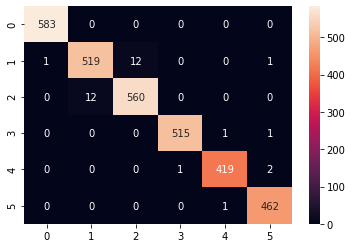

In [22]:
cm=confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cm, annot=True, fmt='d')

## Question 5

* Create an AdaBoost model and fit it using grid search, much like question 4. Try a range of estimators between 100 and 200.
* Compare the errors from AdaBoost to those from the GradientBoostedClassifier.

**NOTE:** Setting `max_features=4` in the decision tree classifier used as the base classifier for AdaBoost will increase the convergence rate.

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {"n_estimators": [100, 120, 140, 160, 180, 200]}

GR_Ada = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4)), param_grid=param_grid, scoring='accuracy', n_jobs=-1)
GR_Ada = GR_Ada.fit(X_train, y_train)

C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
GR_Ada.best_estimator_.n_estimators

180

In [25]:
y_train_pred = GR_Ada.predict(X_train)
y_test_pred = GR_Ada.predict(X_test)
ada = pd.concat([measure_error(y_train, y_train_pred, 'train'), measure_error(y_test, y_test_pred, 'test')],axis=1)
ada

,train,test
accuracy,1.0,0.800647
precision,1.0,0.802403
recall,1.0,0.802971
f1,1.0,0.802572


In [26]:
frames = [ttge,ada]

df_keys = pd.concat(frames, keys=['GradientBoostedClassifier', 'AdaBoost'])
df_keys

train      test
GradientBoostedClassifier accuracy     1.0  0.989968
                          precision    1.0  0.990327
                          recall       1.0  0.990310
                          f1           1.0  0.990313
AdaBoost                  accuracy     1.0  0.800647
                          precision    1.0  0.802403
                          recall       1.0  0.802971
                          f1           1.0  0.802572

## Question 6

* Fit a logistic regression model with regularization. This can be a replica of a model that worked well in the exercises from week 4.
* Using `VotingClassifier`, fit the logistic regression model along with either the GratientBoostedClassifier or the AdaBoost model (or both) from questions 4 and 5.
* Determine the error as before and compare the results to the appropriate gradient boosted model(s).
* Plot the confusion matrix for the best model created in this set of exercises.

In [27]:
from sklearn.linear_model import LogisticRegression

l2 = LogisticRegression(random_state=42,penalty='l2')
l2.fit(X_train, y_train)

C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_train_pred = l2.predict(X_train)
y_test_pred = l2.predict(X_test)
l2_df = pd.concat([measure_error(y_train, y_train_pred, 'train'), measure_error(y_test, y_test_pred, 'test')],axis=1)
l2_df

,train,test
accuracy,0.987516,0.984142
precision,0.988308,0.984849
recall,0.988324,0.984869
f1,0.988316,0.984859


In [29]:
frames = [ttge,ada, l2_df]

df_keys = pd.concat(frames, keys=['GradientBoostedClassifier', 'AdaBoost', 'L2 Logistic Regression'])
df_keys

train      test
GradientBoostedClassifier accuracy   1.000000  0.989968
                          precision  1.000000  0.990327
                          recall     1.000000  0.990310
                          f1         1.000000  0.990313
AdaBoost                  accuracy   1.000000  0.800647
                          precision  1.000000  0.802403
                          recall     1.000000  0.802971
                          f1         1.000000  0.802572
L2 Logistic Regression    accuracy   0.987516  0.984142
                          precision  0.988308  0.984849
                          recall     0.988324  0.984869
                          f1         0.988316  0.984859

In [30]:
#best GBC according to grid search
GBC = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, subsample=0.5, max_features=4)

In [31]:
#best AdaBoostClassifier according to grid search
Ada_boost = AdaBoostClassifier(n_estimators=120, base_estimator=DecisionTreeClassifier(max_features=4))

In [32]:
from sklearn.ensemble import VotingClassifier

vcf = VotingClassifier(estimators=[('lr', l2),
                                  ('GBC', GBC),
                                  ('Ada', Ada_boost)], voting='hard')
vcf.fit(X_train, y_train)

C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('GBC',
                              GradientBoostingClassifier(criterion='friedman_mse',
                                                         init=None,
                                                         learning_rat...
                                

In [33]:
y_train_pred = vcf.predict(X_train)
y_test_pred = vcf.predict(X_test)
vcf_df = pd.concat([measure_error(y_train, y_train_pred, 'train'), measure_error(y_test, y_test_pred, 'test')],axis=1)
vcf_df

,train,test
accuracy,1.0,0.987055
precision,1.0,0.987400
recall,1.0,0.987381
f1,1.0,0.987387


In [34]:
frames = [ttge,ada, l2_df, vcf_df]

df_keys = pd.concat(frames, keys=['GradientBoostedClassifier', 'AdaBoost', 'L2 Logistic Regression', 'VotingClassifier'])
df_keys

train      test
GradientBoostedClassifier accuracy   1.000000  0.989968
                          precision  1.000000  0.990327
                          recall     1.000000  0.990310
                          f1         1.000000  0.990313
AdaBoost                  accuracy   1.000000  0.800647
                          precision  1.000000  0.802403
                          recall     1.000000  0.802971
                          f1         1.000000  0.802572
L2 Logistic Regression    accuracy   0.987516  0.984142
                          precision  0.988308  0.984849
                          recall     0.988324  0.984869
                          f1         0.988316  0.984859
VotingClassifier          accuracy   1.000000  0.987055
                          precision  1.000000  0.987400
                          recall     1.000000  0.987381
                          f1         1.000000  0.987387

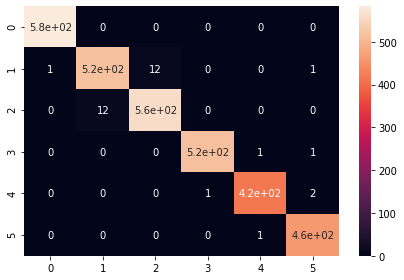

In [37]:
#voting classifier is supposed to be the best one, but for some reason GradientBoostedClassifier is winning
#confusion matrix will be of votingClassifier regardless
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

plt.tight_layout()